## Module 10 - Case study 1

Business challenge/requirement:

Lithionpower is the largest provider of electric vehicle(e-vehicle) batteries. It provides battery on a rental model to e-vehicle drivers. Drivers rent battery typically for a day and then replace it with a charged battery from the company.
Lithionpower has a variable pricing model based on driver's driving history. As the life of a battery depends on factors such as overspeeding, distance driven per day etc.
You as a ML expert have to create a cluster model where drivers can be grouped together based on the driving data.

Key issues:

Drivers will be incentivized based on the cluster, so grouping has to be accurate

Data volume:

- 4000 records – file driver-data.csv

Fields in Data:

• id: Unique Id of the driver
• mean_dist_day: Mean distance driven by driver per day
• mean_over_speed_perc: Mean percentage of time a driver was > 5 mph over the speed limit

Business benefits:

Increase in profits, up to 15-20% as drivers with poor history will be charged more

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv(r'D:\E\Courses\Edureka\Assignments\Dataset\module10\driver-data.csv')

In [5]:
print(df.shape)
df.head(2)

(4000, 3)


,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25


In [6]:
df.isna().sum()

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [11]:
x = df.iloc[:,1:].values
x

array([[ 71.24,  28.  ],
       [ 52.53,  25.  ],
       [ 64.54,  27.  ],
       ...,
       [170.91,  12.  ],
       [176.14,   5.  ],
       [168.03,   9.  ]])

#creating an elbow chart to decide best number of clusters (elbow method)

In [12]:
from sklearn.cluster import KMeans

elbow = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++')
    kmeans.fit(x)
    elbow.append(kmeans.inertia_)

In [13]:
print(elbow)

[12184626.129627975, 1316420.8509477186, 992634.060670247, 719601.5383469037, 534650.9989732959, 372841.1102809509, 319753.5276146007, 276908.22885911213, 252718.56150386453, 231325.34673925472]


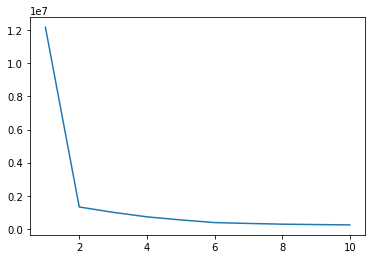

In [14]:
plt.plot(range(1,11), elbow)

In [15]:
## Kmeans Clusing apply with 2 clusters

kmeans = KMeans(n_clusters=2, init='k-means++')
y_kmeans = kmeans.fit_predict(x)

In [16]:
y_kmeans

array([0, 0, 0, ..., 1, 1, 1])

In [17]:
pd.concat([df, pd.DataFrame(y_kmeans)], axis=1)

,id,mean_dist_day,mean_over_speed_perc,0
0,3423311935,71.24,28,0
1,3423313212,52.53,25,0
2,3423313724,64.54,27,0
3,3423311373,55.69,22,0
4,3423310999,54.58,25,0
...,...,...,...,...
3995,3423310685,160.04,10,1
3996,3423312600,176.17,5,1
3997,3423312921,170.91,12,1
3998,3423313630,176.14,5,1


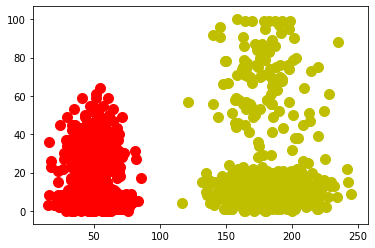

In [18]:
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], s=100, c='r')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], s=100, c='y')

In [19]:
from sklearn.metrics import silhouette_score

In [20]:
silhouette_score(x, y_kmeans)

0.8490223286225532

#### as its almost near to 1, clustering looks good¶

In [21]:
## Kmeans Clusing apply with 3 clusters

kmeans3 = KMeans(n_clusters=3, init='k-means++')
y_kmeans3 = kmeans3.fit_predict(x)

In [22]:
pd.concat([df, pd.DataFrame(y_kmeans3)], axis=1)

,id,mean_dist_day,mean_over_speed_perc,0
0,3423311935,71.24,28,0
1,3423313212,52.53,25,0
2,3423313724,64.54,27,0
3,3423311373,55.69,22,0
4,3423310999,54.58,25,0
...,...,...,...,...
3995,3423310685,160.04,10,1
3996,3423312600,176.17,5,1
3997,3423312921,170.91,12,1
3998,3423313630,176.14,5,1


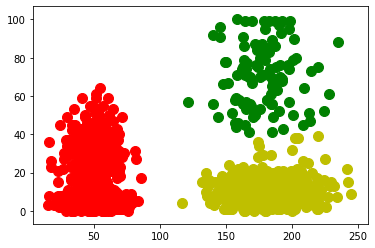

In [23]:
plt.scatter(x[y_kmeans3==0, 0], x[y_kmeans3==0, 1], s=100, c='r')
plt.scatter(x[y_kmeans3==1, 0], x[y_kmeans3==1, 1], s=100, c='y')
plt.scatter(x[y_kmeans3==2, 0], x[y_kmeans3==2, 1], s=100, c='g')

### First model (y_kmeans) can be used for clustering if we are looking at mean_distance_day only. If mean over speed is also tobe considered we can use second model (y_kmeans3).